In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
train = pd.read_csv('datasets/train.csv', keep_default_na=False, na_values=[''])
train.isnull().sum().sort_values(ascending=False).head(10)

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cond         1
Bsmt Qual           1
dtype: int64

In [3]:
train = train[train['Gr Liv Area'] < 4000]

In [4]:
train['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [5]:
train = train.loc[(train['Bldg Type'] == '2fmCon') | (train['Bldg Type'] == 'Duplex')]

In [6]:
train.shape

(121, 81)

### Data Cleaning

In [7]:
train.columns = [col.replace(' ', '_') for col in train.columns]

In [8]:
train.columns = train.columns.str.lower()

In [9]:
train.rename(columns={'saleprice': 'sale_price'}, inplace=True)

### Train/Test Split

In [10]:
features = [
    'gr_liv_area', 
    'overall_qual', 
    'year_built',
    'ms_zoning'
]

In [11]:
X = train[features]
y = train['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scaling

In [33]:
ss = StandardScaler()
print(ss.fit(X_train))

StandardScaler()


In [34]:
print(ss.mean_)

[1.51177848e+03 6.06048704e+00 1.96936292e+03 1.57109191e-03
 1.02120974e-02 3.06362922e-02 7.85545954e-04 3.14218382e-03
 8.30322074e-01 1.23330715e-01]


In [35]:
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)

In [36]:
ss = StandardScaler()
print(ss.fit(X_test))

StandardScaler()


In [37]:
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

## Visuals

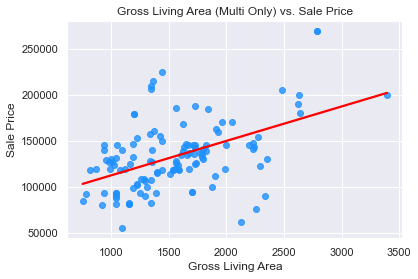

In [17]:
ax = sns.regplot(x = 'gr_liv_area',
            y = 'sale_price', 
            ci = None,
            data = train,
            scatter_kws={"color": "dodgerblue"}, line_kws={"color": "red"})
ax.set(xlabel='Gross Living Area',
       ylabel='Sale Price',
       title='Gross Living Area (Multi Only) vs. Sale Price');

sns.set(rc={'figure.figsize':(6,4)})